# ECE 57000 Assignment 3 Exercise

Your Name: Justin Helfman

In [ ]:
#Importing necessary libraries
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
#Importing necessary data
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,),(0.3081,))])

train_dataset = torchvision.datasets.MNIST('/data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST('/data', train=False, download=True, transform=transform)

batch_size_train, batch_size_test = 64, 1000

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False)

## Exercise 1: Why use a CNN rather than only fully connected layers? (MNIST)

In this exercise, you will build two models for the **MNIST** dataset: one uses only fully connected layers and another uses a standard CNN layout (convolution layers everywhere except the last layer is fully connected layer). The two models should be built with roughly the same accuracy performance, your task is to compare the number of network parameters (a huge number of parameters can affect training/testing time, memory requirements, overfitting, etc.).

### Task 1: Following the structure used in the instructions, you should create

*   One network named **OurFC** which should consist with only fully connected layers

  *   You should decide how many layers and how many hidden dimensions you want in your network 
  *   Your final accuracy on the test dataset should lie roughly around 90% ($\pm$2%)
  *   There is no need to make the neural network unnecessarily complex, your total training time should no longer than 3 mins

*   Another network named **OurCNN** which applys a standard CNN structure
  *   Again, you should decide how many layers and how many channels you want for each layer.
  *   Your final accuracy also should lie roughly around 90% ($\pm$2%)
  *   A standard CNN structure can be composed as **[Conv2d, MaxPooling, ReLU] x num_conv_layers + FC x num_fc_layers**

* Train and test your network on MNIST data as in the instructions

#Convolutional Neural Network:

In [ ]:
def train(epoch):

  classifier_CNN.train() # we need to set the mode for our model

  for batch_idx, (images, targets) in enumerate(train_loader):

    optimizer_CNN.zero_grad()
    output = classifier_CNN(images)
    loss = F.nll_loss(output, targets) # Here is a typical loss function (negative log likelihood)
    loss.backward()
    optimizer_CNN.step()

    if batch_idx % 10 == 0: # We record our output every 10 batches
      train_losses_CNN.append(loss.item()) # item() is to get the value of the tensor directly
      train_counter_CNN.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    if batch_idx % 100 == 0: # We visulize our output every 10 batches
      print(f'Epoch {epoch}: [{batch_idx*len(images)}/{len(train_loader.dataset)}] Loss: {loss.item()}')


def test(epoch):

  classifier_CNN.eval() # we need to set the mode for our model

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for images, targets in test_loader:
      output = classifier_CNN(images)
      test_loss += F.nll_loss(output, targets, reduction='sum').item()
      pred = output.data.max(1, keepdim=True)[1] # we get the estimate of our result by look at the largest class value
      correct += pred.eq(targets.data.view_as(pred)).sum() # sum up the corrected samples
  
  test_loss /= len(test_loader.dataset)
  test_losses_CNN.append(test_loss)
  test_counter_CNN.append(len(train_loader.dataset)*epoch)

  print(f'Test result on epoch {epoch}: Avg loss is {test_loss}, Accuracy: {100.*correct/len(test_loader.dataset)}%')


class OurCNN(nn.Module): # Any neural generated network should be generate

  def __init__(self):
    super(OurCNN, self).__init__()

    self.conv = nn.Conv2d(1, 3, kernel_size=5)
    self.fc = nn.Linear(432, 10)

  def forward(self, x):
    x = self.conv(x)        # x now has shape (batchsize x 3 x 24 x 24)
    x = F.relu(F.max_pool2d(x,2))  # x now has shape (batchsize x 3 x 12 x 12)
    x = x.view(-1, 432)      # x now has shape (batchsize x 432)
    x = F.relu(self.fc(x))     # x has shape (batchsize x 10)
    return F.log_softmax(x,-1) 

classifier_CNN = OurCNN()
optimizer_CNN = optim.SGD(classifier_CNN.parameters(), lr=0.01, momentum=0.8)

train_losses_CNN = []
train_counter_CNN = []
test_losses_CNN = []
test_counter_CNN = []
max_epoch = 3

for epoch in range(1, max_epoch+1):
  train(epoch)
  test(epoch)

Epoch 1: [0/60000] Loss: 2.3374245166778564
Epoch 1: [6400/60000] Loss: 0.39646390080451965
Epoch 1: [12800/60000] Loss: 0.396554559469223
Epoch 1: [19200/60000] Loss: 0.31226781010627747
Epoch 1: [25600/60000] Loss: 0.1492530107498169
Epoch 1: [32000/60000] Loss: 0.1200590580701828
Epoch 1: [38400/60000] Loss: 0.31773480772972107
Epoch 1: [44800/60000] Loss: 0.13777780532836914
Epoch 1: [51200/60000] Loss: 0.25846174359321594
Epoch 1: [57600/60000] Loss: 0.05379095301032066
Test result on epoch 1: Avg loss is 0.12350023651123047, Accuracy: 96.11000061035156%
Epoch 2: [0/60000] Loss: 0.26684093475341797
Epoch 2: [6400/60000] Loss: 0.3049767315387726
Epoch 2: [12800/60000] Loss: 0.13925817608833313
Epoch 2: [19200/60000] Loss: 0.08937383443117142
Epoch 2: [25600/60000] Loss: 0.16176843643188477
Epoch 2: [32000/60000] Loss: 0.12412364780902863
Epoch 2: [38400/60000] Loss: 0.2021305114030838
Epoch 2: [44800/60000] Loss: 0.17585057020187378
Epoch 2: [51200/60000] Loss: 0.17242377996444702


#Fully Connected Neural Network:

In [ ]:
"""
    1. Fully connected layers ONLY
    2. Freedom to decide how many layers and hidden dimensions
    3. final accuracy should be 90% (+-2%)
    4. Don't be too complex, training time should be <3 mins
"""
def train(epoch):

  classifier_FC.train() # we need to set the mode for our model

  for batch_idx, (images, targets) in enumerate(train_loader):

    optimizer_FC.zero_grad()
    output = classifier_FC(images)
    loss = F.nll_loss(output, targets) # Here is a typical loss function (negative log likelihood)
    loss.backward()
    optimizer_FC.step()

    if batch_idx % 10 == 0: # We record our output every 10 batches
      train_losses_FC.append(loss.item()) # item() is to get the value of the tensor directly
      train_counter_FC.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    if batch_idx % 100 == 0: # We visulize our output every 10 batches
      print(f'Epoch {epoch}: [{batch_idx*len(images)}/{len(train_loader.dataset)}] Loss: {loss.item()}')


def test(epoch):

  classifier_FC.eval() # we need to set the mode for our model

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for images, targets in test_loader:
      output = classifier_FC(images)
      test_loss += F.nll_loss(output, targets, reduction='sum').item()
      pred = output.data.max(1, keepdim=True)[1] # we get the estimate of our result by look at the largest class value
      correct += pred.eq(targets.data.view_as(pred)).sum() # sum up the corrected samples
  
  test_loss /= len(test_loader.dataset)
  test_losses_FC.append(test_loss)
  test_counter_FC.append(len(train_loader.dataset)*epoch)

  print(f'Test result on epoch {epoch}: Avg loss is {test_loss}, Accuracy: {100.*correct/len(test_loader.dataset)}%')

class OurFC(nn.Module): # Any neural generated network should be generate

  def __init__(self):
    super(OurFC, self).__init__()

    self.conv = nn.Conv2d(1, 3, kernel_size=5)
    self.fc = nn.Linear(28**2, 10)

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = F.relu(self.fc(x))
    x = x.view(-1, 10)
    return F.log_softmax(x,-1) 


classifier_FC = OurFC()
optimizer_FC = optim.SGD(classifier_FC.parameters(), lr=0.01, momentum=0.8)

train_losses_FC = []
train_counter_FC = []
test_losses_FC = []
test_counter_FC = []
max_epoch = 3

for epoch in range(1, max_epoch+1):
  train(epoch)
  test(epoch)

Epoch 1: [0/60000] Loss: 2.3196702003479004
Epoch 1: [6400/60000] Loss: 0.8618990778923035
Epoch 1: [12800/60000] Loss: 0.5300676822662354
Epoch 1: [19200/60000] Loss: 1.0241349935531616
Epoch 1: [25600/60000] Loss: 0.6054297089576721
Epoch 1: [32000/60000] Loss: 0.6191982626914978
Epoch 1: [38400/60000] Loss: 0.6340441703796387
Epoch 1: [44800/60000] Loss: 0.7521542310714722
Epoch 1: [51200/60000] Loss: 0.6096084713935852
Epoch 1: [57600/60000] Loss: 0.5363025665283203
Test result on epoch 1: Avg loss is 0.5428917266845703, Accuracy: 80.45999908447266%
Epoch 2: [0/60000] Loss: 0.5950859189033508
Epoch 2: [6400/60000] Loss: 0.5798784494400024
Epoch 2: [12800/60000] Loss: 0.5252024531364441
Epoch 2: [19200/60000] Loss: 0.3330695927143097
Epoch 2: [25600/60000] Loss: 0.66451495885849
Epoch 2: [32000/60000] Loss: 0.44179821014404297
Epoch 2: [38400/60000] Loss: 0.4484802484512329
Epoch 2: [44800/60000] Loss: 0.7024227976799011
Epoch 2: [51200/60000] Loss: 0.6044352650642395
Epoch 2: [5760

### Task 2: Compare the number of parameters that are used in both your neural networks by printing out the total number of parameters for both of your networks.

In [ ]:
total_params_FC = sum(p.numel() for p in classifier_FC.parameters())
print(f'Our neural network has a total of {total_params_FC} parameters')
total_params_CNN = sum(p.numel() for p in classifier_CNN.parameters())
print(f'The CNN has a total of {total_params_CNN} parameters')

Our neural network has a total of 7928 parameters
The CNN has a total of 4408 parameters


## Exercise 2: Train classifier on CIFAR-10 data.
Now, lets move our dataset to color images. CIFAR-10 dataset is another widely used dataset. Here all images have colors, i.e each image has 3 color channels instead of only one channel in MNIST. You need to pay more attention to the dimension of the data when it is walking through your network.

### Task 1:
Set up a `train_loader` and `test_loader` for the CIFAR-10 data, and plot a figure:

*   3 x 3 subplot
*   each subplot is a randomly chosen image from the test dataset
*   label each image with its label

The corresponding names of the classes is given as 
`classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')`

Note: In your transforms, the normalizing constant is given as `transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])`

In [ ]:
# ----------- <Your code> ---------------
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10('/data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10('/data', train=False, download=True, transform=transform)

batch_size_train, batch_size_test = 64, 1000

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


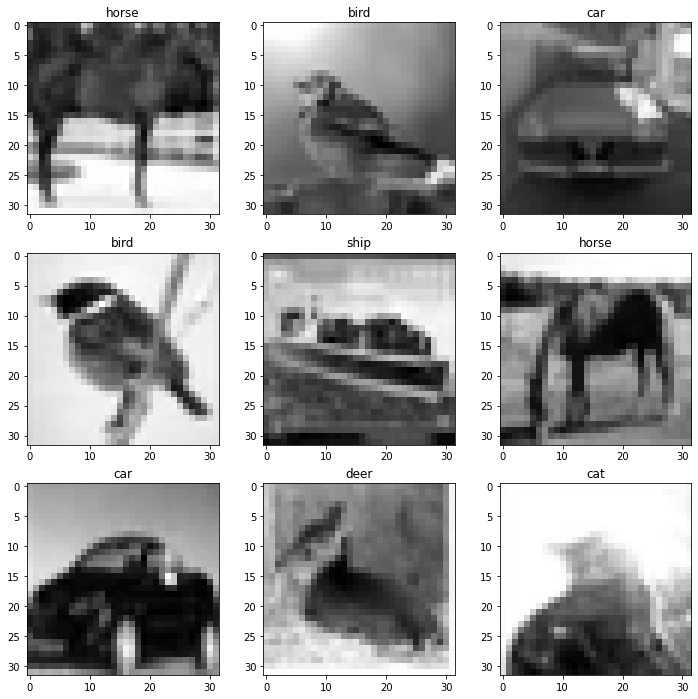

In [ ]:
batch_idx, (images, targets) = next(enumerate(train_loader))

fig, ax = plt.subplots(3,3)
fig.set_size_inches(12,12)
for i in range(3):
  for j in range(3):
    ax[i,j].imshow(images[i*3+j][0], cmap='gray') #transpose color dim
    ax[i,j].set_title(f'{classes[targets[i*3+j]]}')
fig.show()

In [ ]:
#50000, 2, 3, 32, 32

### Task 2:
Set up a convolutional neural network and have your data trained on it. You have to decide all the details in your network, overall your neural network should meet the following standards:


*   You should not use more than three convolutional layers and three fully connected layers
*   Accuracy on the test dataset should be roughly 50%



In [ ]:
# ----------- <Your code> ---------------
# You should have your test accuracy printed in the output box
"""
1. <=3 convolutional layers
2. <=3 fully connected layers
3. Accuracy ~ 50%
"""
class ColorCNN(nn.Module): # Any neural generated network should be generate

  def __init__(self):
    super(ColorCNN, self).__init__()

    self.conv = nn.Conv2d(3, 3, kernel_size=5)  
    self.fc = nn.Linear(28*21, 10) 

  def layer1(self, x):
    x = self.conv(x)
    x = F.relu(F.max_pool2d(x,2))
    x = x.view(-1, 28*21)
    x = F.relu(self.fc(x))
    return x

  def forward(self, x):
    x.permute(0, 1, 3, 2)
    
    x = self.layer1(x)

    return F.log_softmax(x,-1) 

classifier = ColorCNN() #Create the classifier
optimizer = optim.SGD(classifier.parameters(), lr=0.01, momentum=0.8) #Create the optimizer

def train(epoch):

  classifier.train() # we need to set the mode for our model

  for batch_idx, (images, targets) in enumerate(train_loader):

    optimizer.zero_grad()
    output = classifier(images)
    loss = F.nll_loss(output, targets) # Here is a typical loss function (negative log likelihood)
    loss.backward()
    optimizer.step()

    if batch_idx % 10 == 0: # We record our output every 10 batches
      train_losses.append(loss.item()) # item() is to get the value of the tensor directly
      train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    if batch_idx % 100 == 0: # We visulize our output every 10 batches
      print(f'Epoch {epoch}: [{batch_idx*len(images)}/{len(train_loader.dataset)}] Loss: {loss.item()}')


def test(epoch):

  classifier.eval() # we need to set the mode for our model

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for images, targets in test_loader:
      output = classifier(images)
      test_loss += F.nll_loss(output, targets, reduction='sum').item()
      pred = output.data.max(1, keepdim=True)[1] # we get the estimate of our result by look at the largest class value
      correct += pred.eq(targets.data.view_as(pred)).sum() # sum up the corrected samples
      wrong_index = ((pred == targets) == False).nonzero()
      wrong.append(wrong_index)
  
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  test_counter.append(len(train_loader.dataset)*epoch)

  print(f'Test result on epoch {epoch}: Avg loss is {test_loss}, Accuracy: {100.*correct/len(test_loader.dataset)}%')

train_losses = []
train_counter = []
test_losses = []
test_counter = []
wrong = []
max_epoch = 1



for epoch in range(1, max_epoch+1):
  train(epoch)
  test(epoch)


Epoch 1: [0/50000] Loss: 2.2856457233428955
Epoch 1: [6400/50000] Loss: 1.91511869430542
Epoch 1: [12800/50000] Loss: 2.2450602054595947
Epoch 1: [19200/50000] Loss: 1.6677205562591553
Epoch 1: [25600/50000] Loss: 1.7171270847320557
Epoch 1: [32000/50000] Loss: 1.644973874092102
Epoch 1: [38400/50000] Loss: 1.6324398517608643
Epoch 1: [44800/50000] Loss: 1.7105042934417725
Test result on epoch 1: Avg loss is 1.6310776489257812, Accuracy: 42.20000076293945%


### Task 3:
Plot some misclassified images in your test dataset:

*   select three images that are **misclassified** by your neural network
*   label each images with true label and predicted label



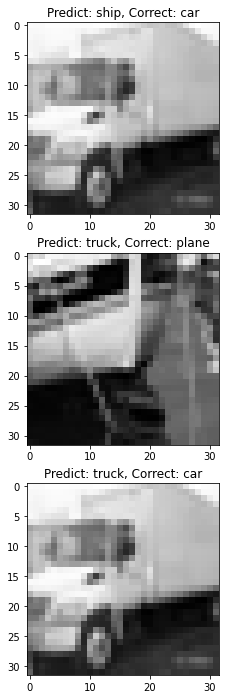

In [ ]:
batch_idx, (images, targets) = next(enumerate(train_loader))

fig, ax = plt.subplots(3,1)
fig.set_size_inches(12,12)
for i in range(3):
  ax[i].imshow(images[wrong[0][0]*3][i-1][0], cmap='gray')
  ax[i].set_title(f'Predict: {classes[targets[i*3]]}, Correct: {classes[wrong[0][0][i-1]]}')
fig.show()

Questions (0 points): Does the mis-classified images somehow also misleading for human eyes? I.e, Does a human also have a high probabability of misclassifying those images?